In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# イジングモデルの認識

$$\frac{Tc}{J} = \frac{2}{\log{(1 + \sqrt{2})}}$$
$J=1$で固定した。

In [140]:
Tc = 2 / np.log(1 + np.sqrt(2))
Tc

2.2691853142130221

# $Tc < T$のデータ(ラベル -1)を`Data0`に代入

In [141]:
Data0 = pd.read_csv("isingModel_data_0.csv")
Data0.head()

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,label
0,-1,1,1,1,1,1,1,-1,-1,1,...,1,1,1,-1,-1,1,1,1,-1,0
1,-1,-1,-1,-1,1,1,1,-1,1,1,...,1,1,1,1,1,1,1,-1,-1,0
2,1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,1,1,1,1,1,0
3,1,1,-1,-1,-1,-1,-1,-1,1,1,...,1,1,1,1,-1,-1,-1,-1,1,0
4,1,1,1,-1,-1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,0


In [142]:
Data0.shape

(3000, 2501)

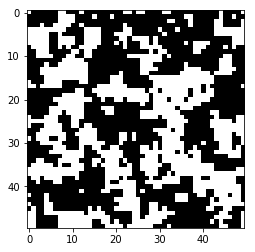

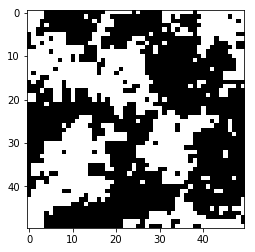

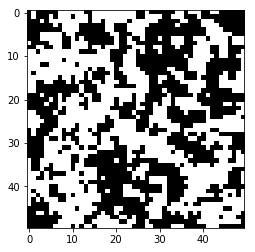

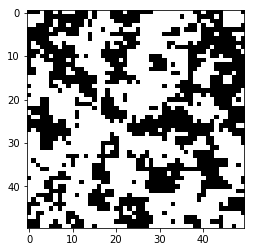

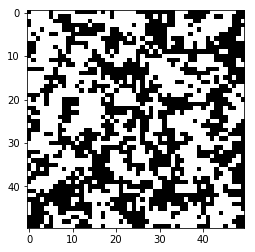

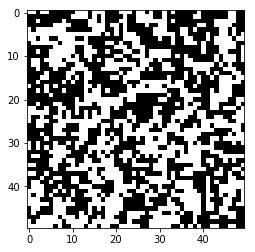

In [143]:
# plot
from itertools import product

size=50
"""
fig, ax = plt.subplots(3, 2, figsize=(20, 10))
for idx, i in zip(product([0,1,2], [0,1]), [0, 100, 300, 500, 1500, 2900]):
    ax[idx[0], idx[1]].imshow(Data1.iloc[i, :-1].values.reshape(size, size), vmin=-1, vmax=1,
                         cmap=plt.cm.gray_r, interpolation='nearest')
"""
for i in [0, 100, 300, 500, 1500, 2900]:
    plt.imshow(Data0.iloc[i, :-1].values.reshape(size, size), vmin=-1, vmax=1,
                         cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

# $Tc > T$のデータ(ラベル 1)を`Data1`に代入

In [144]:
Data1 =  pd.read_csv("isingModel_data_1.csv")
Data1.head()

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,label
0,1,1,1,1,1,1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
1,-1,-1,-1,-1,-1,-1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,1,-1,1
2,1,1,1,1,1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
3,-1,1,1,1,1,1,1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,1
4,1,1,1,1,1,1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


In [145]:
Data1.shape

(3000, 2501)

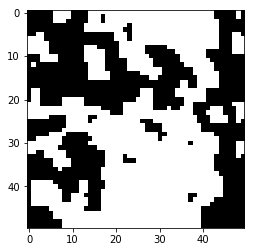

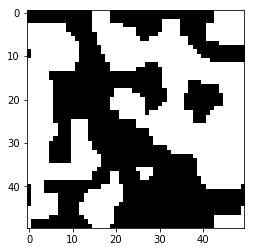

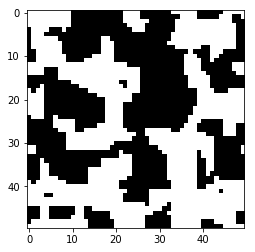

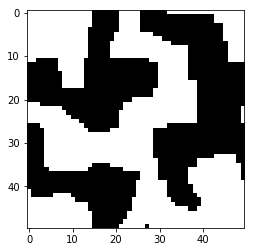

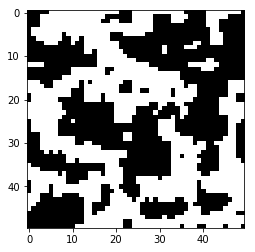

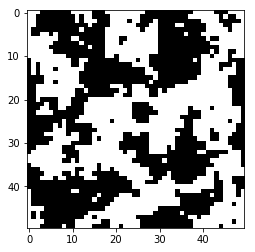

In [146]:
#plot

size=50
for i in [0, 100, 300, 500, 1500, 2900]:
    plt.imshow(Data1.iloc[i, :-1].values.reshape(size, size), vmin=-1, vmax=1,
                         cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

# データ行列 $\boldsymbol{X}$ とラベル $\boldsymbol{y}$ を作成

In [147]:
X = pd.concat([Data0.iloc[ :,:-1], Data1.iloc[ :,:-1]], ignore_index=True)
X

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,-1,1,1,1,1,1,1,-1,-1,1,...,1,1,1,1,-1,-1,1,1,1,-1
1,-1,-1,-1,-1,1,1,1,-1,1,1,...,1,1,1,1,1,1,1,1,-1,-1
2,1,1,1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,1,1,1,1,1
3,1,1,-1,-1,-1,-1,-1,-1,1,1,...,1,1,1,1,1,-1,-1,-1,-1,1
4,1,1,1,-1,-1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
5,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,1,1,1,1,1,1,1
6,-1,-1,1,1,1,1,-1,1,-1,1,...,1,1,-1,-1,-1,-1,-1,-1,1,1
7,-1,1,1,1,1,1,1,1,1,-1,...,1,1,-1,-1,1,1,-1,-1,1,1
8,1,1,1,-1,1,-1,-1,1,-1,1,...,1,1,1,1,1,-1,-1,1,1,1
9,1,1,-1,-1,-1,-1,-1,1,1,1,...,1,1,1,-1,-1,-1,-1,1,1,1


In [148]:
y = pd.concat([Data0.iloc[:,-1], Data1.iloc[:,-1]], ignore_index=True)
y

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
5970    1
5971    1
5972    1
5973    1
5974    1
5975    1
5976    1
5977    1
5978    1
5979    1
5980    1
5981    1
5982    1
5983    1
5984    1
5985    1
5986    1
5987    1
5988    1
5989    1
5990    1
5991    1
5992    1
5993    1
5994    1
5995    1
5996    1
5997    1
5998    1
5999    1
Name: label, Length: 6000, dtype: int64

In [149]:
np.bincount(y)

array([3000, 3000], dtype=int64)

# テストデータと学習データに分割

In [150]:
from sklearn.model_selection import train_test_split

# テストデータサイズは全体の３割 
# 層化を行いクラスごとのデータ数の偏りをなくす
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,
                                                    stratify=y, shuffle=True)

print(np.unique(y_train, return_counts=True)[1] / y_train.size)
print(np.unique(y_test, return_counts=True)[1] / y_test.size)

[ 0.5  0.5]
[ 0.5  0.5]


# MLP( Neural Network) で識別

In [151]:
from sklearn.preprocessing import StandardScaler  # 標準化
sc = StandardScaler()
"""
X_train_sc = sc.fit_transform(X_train, y_train)

for i in [0, -100, -300, -500, -1500, -2900]:
    plt.imshow(X_train.iloc[i, :].values.reshape(size, size), vmin=-1, vmax=1,
                         cmap=plt.cm.gray_r, interpolation='nearest')
    plt.imshow(X_train_sc[i, :].reshape(size, size), vmin=-1, vmax=1,
                         cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()
"""

"\nX_train_sc = sc.fit_transform(X_train, y_train)\n\nfor i in [0, -100, -300, -500, -1500, -2900]:\n    plt.imshow(X_train.iloc[i, :].values.reshape(size, size), vmin=-1, vmax=1,\n                         cmap=plt.cm.gray_r, interpolation='nearest')\n    plt.imshow(X_train_sc[i, :].reshape(size, size), vmin=-1, vmax=1,\n                         cmap=plt.cm.gray_r, interpolation='nearest')\n    plt.show()\n"

In [152]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(3,)) # 隠れ層１層で隠れ素子は3つ

あとの引数はdefault

[sklearn.neural_network.MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [153]:
from sklearn.pipeline import Pipeline
steps = [('sc', sc), ('mlp', mlp)]
# steps = [('mlp', mlp)]
pipe = Pipeline(steps=steps)

In [154]:
pipe.set_params

<bound method Pipeline.set_params of Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='constant',
       learning_rate_init...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])>

In [155]:
pipe.fit(X_train, y_train)

C:\Users\4th\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='constant',
       learning_rate_init...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])

In [156]:
pipe.score(X_test, y_test)

0.59277777777777774

# グリッドサーチ

__前処理__
 - 白色化PCA
 - PCA
 - 標準化
 - 線形判別分析(LDA)
 - 白色化ZCA (<- まだ実装していないのでだめ)
 
__MLPパラメータ__ (隠れ層 1つ, 隠れ素子 3つ)
 - 正則化係数
 - 活性化関数

In [157]:
from sklearn.grid_search import GridSearchCV

param_grid={'mlp__alpha': [10**n for n in range(-3, 3)]}

grid = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid.fit(X_train.values, y_train.ravel())

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  2.2min remaining:   50.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  2.4min finished
C:\Users\4th\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='constant',
       learning_rate_init...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'mlp__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [158]:
grid.best_params_

{'mlp__alpha': 0.1}

In [159]:
grid.best_score_

0.5988095238095238

In [160]:
grid.score(X_test, y_test)

0.61777777777777776

In [161]:
grid.best_estimator_.named_steps['mlp'].coefs_ # The ith element in the list represents the weight matrix corresponding to layer i.

[array([[-0.0437574 ,  0.01450125, -0.06423382],
        [ 0.05633533, -0.06656404, -0.07490076],
        [ 0.10951358,  0.09543275, -0.09019392],
        ..., 
        [ 0.06329607,  0.06040751, -0.05690784],
        [-0.14720005, -0.0149934 ,  0.01002728],
        [ 0.05913075,  0.0613535 , -0.07564829]]), array([[-2.02366617],
        [ 1.73299044],
        [ 1.78260508]])]

In [162]:
grid.best_estimator_.named_steps['mlp'].intercepts_ # バイアス項

[array([ 0.45982446,  0.00865902,  0.02363208]), array([-2.27946635])]

# やってみたいこと

[重みの視覚化 Visualization of MLP weights on MNIST](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html)

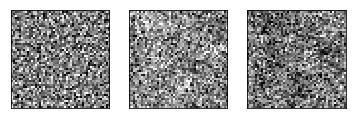

In [163]:
mlp = grid.best_estimator_.named_steps['mlp']
fig, axes = plt.subplots(1, 3)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(50, 50), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())